In [5]:
!pip install pyspark

In [52]:
import pyspark
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType
import os
import ipywidgets as widgets
from IPython.display import display, HTML


In [7]:
spark = SparkSession.builder.master("local").appName("anime").getOrCreate()
# Check if a Spark session has been started
if spark:
    print("PySpark session has been started.")
else:
    print("PySpark session has not been started.")


PySpark session has been started.


In [8]:
df_anime = pd.read_csv('/content/anime-dataset-2023.csv')
df_user_details = pd.read_csv('/content/users-details-2023.csv')
df_user_score = pd.read_csv('/content/users-score-2023.csv')

# **Convert CSV to PARQUET**

In [10]:
import os
file_size1 = os.path.getsize('/content/anime-dataset-2023.csv')
file_size2 = os.path.getsize('/content/users-details-2023.csv')
file_size3 = os.path.getsize('/content/users-score-2023.csv')
#file_size4 = os.path.getsize('/content/anime-filtered.csv')
#file_size5 = os.path.getsize('/content/user-filtered.csv')
#file_size6 = os.path.getsize('/content/final_animedataset.csv')

file_size_new1 = file_size1 / (1024 * 1024)
file_size_new2 = file_size2 / (1024 * 1024)
file_size_new3 = file_size3 / (1024 * 1024)
#file_size_new4 = file_size4 / (1024 * 1024)
#file_size_new5 = file_size5 / (1024 * 1024)
#file_size_new6 = file_size6 / (1024 * 1024)

print(f"Size of anime_datasets_2023.csv: {file_size_new1} mb")
print(f"Size of users-details-2023.csv: {file_size_new2} mb")
print(f"Size of users-score-2023.csv: {file_size_new3} mb")
#print(f"Size of anime-filtered.csv: {file_size_new4} mb")
#print(f"Size of user-filtered.csv: {file_size_new5} mb")
#print(f"Size of final_animedataset.csv: {file_size_new6} mb")

Size of anime_datasets_2023.csv: 15.18701457977295 mb
Size of users-details-2023.csv: 70.5025806427002 mb
Size of users-score-2023.csv: 383.0 mb


In [11]:
import pyarrow.parquet as pq
import pyarrow as pa
#df_user_filter = pd.read_csv('/content/user-filtered.csv')
#df_anime_filter = pd.read_csv('/content/anime-filtered.csv')

# Convert the DataFrame to a PyArrow Table
table1 = pa.Table.from_pandas(df_anime)
table2= pa.Table.from_pandas(df_user_details)
table3 = pa.Table.from_pandas(df_user_score)
#table4 = pa.Table.from_pandas(df_user_filter)
#table5 = pa.Table.from_pandas(df_anime_filter)
#table6 = pa.Table.from_pandas(df_user_score)


# Save as a Parquet file
pq.write_table(table1, 'anime-dataset-2023.parquet')
pq.write_table(table2, 'users-details-2023.parquet')
pq.write_table(table3, 'users-score-2023.parquet')
#pq.write_table(table4, 'user-filtered.parquet')
#pq.write_table(table5, 'anime-filtered.parquet')

In [12]:
parquet_df_anime = pd.read_parquet('anime-dataset-2023.parquet')
parquet_df_user_details = pd.read_parquet('users-details-2023.parquet')
parquet_df_user_score = pd.read_parquet('users-score-2023.parquet')
#parquet_df_user_filter = pd.read_parquet('user-filtered.parquet')
#parquet_df_anime_filter = pd.read_parquet('anime-filtered.parquet')

In [13]:
file_size1 = os.path.getsize('anime-dataset-2023.parquet')
file_size2 = os.path.getsize('users-details-2023.parquet')
file_size3 = os.path.getsize('users-score-2023.parquet')
#file_size4 = os.path.getsize('anime-filtered.parquet')
#file_size5 = os.path.getsize('user-filtered.parquet')

file_size_new1 = file_size1 / (1024 * 1024)
file_size_new2 = file_size2 / (1024 * 1024)
file_size_new3 = file_size3 / (1024 * 1024)
#file_size_new4 = file_size4 / (1024 * 1024)
#file_size_new5 = file_size5 / (1024 * 1024)


print(f"Size of anime-dataset-2023.parquet: {file_size_new1} mb")
print(f"Size of users-details-2023.parquet: {file_size_new2} mb")
print(f"Size of users-score-2023.parquet: {file_size_new3} mb")
#print(f"Size of user-filtered.parquet: {file_size_new4} mb")
#print(f"Size of anime.filtered.parquet: {file_size_new5} mb")

Size of anime-dataset-2023.parquet: 7.634571075439453 mb
Size of users-details-2023.parquet: 19.54450225830078 mb
Size of users-score-2023.parquet: 26.686260223388672 mb


In [14]:
type(parquet_df_anime)

pandas.core.frame.DataFrame

# **Data Preprocessing**

## 1. Data preprocessing of *anime-dataset.parquet*

In [15]:
# Rename all columns to lowercase
parquet_df_anime.columns = parquet_df_anime.columns.str.lower()
parquet_df_anime.head(3)

,anime_id,name,english name,other name,score,genres,synopsis,type,episodes,aired,...,studios,source,duration,rating,rank,popularity,favorites,scored by,members,image url
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...


In [16]:
# Check and print the exact column names in the DataFrame
print(parquet_df_anime.columns)


Index(['anime_id', 'name', 'english name', 'other name', 'score', 'genres',
       'synopsis', 'type', 'episodes', 'aired', 'premiered', 'status',
       'producers', 'licensors', 'studios', 'source', 'duration', 'rating',
       'rank', 'popularity', 'favorites', 'scored by', 'members', 'image url'],
      dtype='object')


In [17]:
# Removing unwanted columns from anime-dataset.parquet
# Here, other name, Synopsis are not important
unwanted_col = ['other name', 'synopsis']

# Drop the specified columns
parquet_df_anime_updated = parquet_df_anime.drop(columns=unwanted_col)
parquet_df_anime_updated.head(2)

,anime_id,name,english name,score,genres,type,episodes,aired,premiered,status,...,studios,source,duration,rating,rank,popularity,favorites,scored by,members,image url
0,1,Cowboy Bebop,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,8.38,"Action, Sci-Fi",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...


In [ ]:
# Check for NaN or null values in the DataFrame
nan_check = df_anime.isnull()  # or parquet_df_anime.isnull()

# Check if there are any NaN or null values in the DataFrame
if nan_check.any().any():
    print("There are NaN or null values in the anime-dataset.parquet")
else:
    print("No NaN or null values found in the anime-dataset.parquet")


No NaN or null values found in the anime-dataset.parquet


In [18]:
parquet_df_anime_updated.describe()

,anime_id,popularity,favorites,members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


In [ ]:
parquet_df_anime_updated['score'].value_counts()

UNKNOWN    9213
6.31         80
6.54         80
6.25         79
6.51         79
           ... 
3.21          1
3.29          1
1.85          1
3.69          1
4.07          1
Name: score, Length: 567, dtype: int64

In [19]:
scores = parquet_df_anime_updated['score'][parquet_df_anime_updated['score'] != 'UNKNOWN']
scores = scores.astype('float')
score_mean= round(scores.mean() , 2)

In [20]:
parquet_df_anime_updated['score'] = parquet_df_anime_updated['score'].replace('UNKNOWN', score_mean)
parquet_df_anime_updated['score'] = parquet_df_anime_updated['score'].astype('float64')

parquet_df_anime_updated['score'].value_counts()

6.38    9282
6.31      80
6.54      80
6.51      79
6.25      79
        ... 
3.21       1
3.29       1
1.85       1
3.69       1
4.07       1
Name: score, Length: 566, dtype: int64

In [21]:
# Processing Ranked column
parquet_df_anime_updated['rank'].value_counts()

UNKNOWN    4612
0.0         187
6542.0        4
16675.0       4
6577.0        4
           ... 
18424.0       1
18423.0       1
11642.0       1
8977.0        1
14536.0       1
Name: rank, Length: 15198, dtype: int64

In [22]:
parquet_df_anime_updated['rank'] = parquet_df_anime_updated['rank'].replace('UNKNOWN', np.nan)
parquet_df_anime_updated['rank'] = parquet_df_anime_updated['rank'].astype('float64')

In [23]:
parquet_df_anime_updated['rank'].value_counts()

0.0        187
12611.0      4
18804.0      4
18715.0      4
6577.0       4
          ... 
18424.0      1
18423.0      1
11642.0      1
8977.0       1
14536.0      1
Name: rank, Length: 15197, dtype: int64

In [29]:
parquet_df_anime_updated.isnull().sum()

anime_id        0
name            0
english name    0
score           0
genres          0
type            0
episodes        0
aired           0
premiered       0
status          0
producers       0
licensors       0
studios         0
source          0
duration        0
rating          0
rank            0
popularity      0
favorites       0
scored by       0
members         0
image url       0
dtype: int64

In [30]:
parquet_df_anime_updated.fillna('NaN',inplace=True)

In [ ]:
from IPython.display import Image, display

# Display the first 10 rows
for index, row in df_anime.head(2).iterrows():
    name = row['Name']  # Replace 'name' with the actual column name containing names
    image_url = row['Image URL']  # Replace 'image_url' with the column containing image URLs
    display(f"Name: {name}")
    display(Image(url=image_url))

## 2. Data preprocessing of *user-details.parquet*

In [ ]:
parquet_df_user_details.head(3)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,None,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,None,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0


In [ ]:
# Rename all columns to lowercase
parquet_df_user_details.columns = parquet_df_user_details.columns.str.lower()
parquet_df_user_details.head(6)

,mal id,username,gender,birthday,location,joined,days watched,mean score,watching,completed,on hold,dropped,plan to watch,total entries,rewatched,episodes watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,None,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,None,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,None,None,None,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,None,None,None,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0
5,20,vondur,Male,1988-01-25T00:00:00+00:00,"Bergen, Norway",2005-01-05T00:00:00+00:00,73.1,8.06,11.0,94.0,11.0,2.0,20.0,138.0,7.0,4374.0


In [ ]:
# Check for NaN or null values in the DataFrame
nan_check = parquet_df_user_details.isnull()  # or parquet_df_user_details.isnull()

# Check if there are any NaN or null values in the DataFrame
if nan_check.any().any():
    print("There are NaN or null values in the user-details.parquet")
else:
    print("No NaN or null values found in the user-details.parquet")


There are NaN or null values in the user-details.parquet


In [ ]:
parquet_df_user_details.isnull().sum()

mal id                   0
username                 0
gender              506907
birthday            563222
location            578484
joined                   0
days watched             8
mean score               8
watching                 8
completed                8
on hold                  8
dropped                  8
plan to watch            8
total entries            8
rewatched                8
episodes watched         8
dtype: int64

In [ ]:
parquet_df_user_details.fillna('NaN',inplace=True)

In [ ]:
parquet_df_user_details.isnull().sum()

mal id              0
username            0
gender              0
birthday            0
location            0
joined              0
days watched        0
mean score          0
watching            0
completed           0
on hold             0
dropped             0
plan to watch       0
total entries       0
rewatched           0
episodes watched    0
dtype: int64

In [ ]:
# Find the rows where 'column_name' has NaN values
rows_with_null_values = parquet_df_user_details[parquet_df_user_details['episodes watched'].isnull()]

# Display the rows with NaN values
print(rows_with_null_values)


Empty DataFrame
Columns: [mal id, username, gender, birthday, location, joined, days watched, mean score, watching, completed, on hold, dropped, plan to watch, total entries, rewatched, episodes watched]
Index: []


In [ ]:

parquet_df_user_details['location'] = parquet_df_user_details['location'].str.strip().replace('J�rvenp��, Finland', 'Finland', regex=True)
parquet_df_user_details['location'].value_counts()

NaN                                     578484
Poland                                    2458
Germany                                   1706
Canada                                    1693
California                                1506
                                         ...  
Killing Neko_Neji                            1
in a place with me                           1
On the computer in Outer Space, Asia         1
Far away from you. :D                        1
Newport Coast, California                    1
Name: location, Length: 53285, dtype: int64

In [ ]:
# Replace 'non binary' with 'Not mentioned' in the 'gender' column
parquet_df_user_details['gender'] = parquet_df_user_details['gender'].str.strip().replace('non binary', 'Not mentioned', regex=True)
parquet_df_user_details

,mal id,username,gender,birthday,location,joined,days watched,mean score,watching,completed,on hold,dropped,plan to watch,total entries,rewatched,episodes watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731285,1291083,Dolopa,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731286,1291085,alenrobnik,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,21.4,8.22,16.0,58.0,9.0,1.0,42.0,126.0,0.0,1239.0
731287,1291087,Oblongata,NaN,1993-01-30T00:00:00+00:00,NaN,2012-05-06T00:00:00+00:00,51.3,7.53,38.0,175.0,0.0,9.0,211.0,433.0,2.0,3010.0
731288,1291091,Etnota,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
parquet_df_user_details.head(5)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,None,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,None,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,None,None,None,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,None,None,None,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [ ]:
parquet_df_user_details['gender'].value_counts()

NaN           506907
Male          126984
Female         96485
Non-Binary       914
Name: gender, dtype: int64

In [48]:
parquet_df_user_details.columns

Index(['Mal ID', 'Username', 'Gender', 'Birthday', 'Location', 'Joined',
       'Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
       'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched', 'User Type'],
      dtype='object')

In [39]:
parquet_df_user_details['Watching'].value_counts()

0.0      406513
1.0       61276
2.0       41558
3.0       32552
4.0       26306
          ...  
326.0         1
422.0         1
470.0         1
451.0         1
989.0         1
Name: Watching, Length: 553, dtype: int64

Index(['Mal ID', 'Username', 'Gender', 'Birthday', 'Location', 'Joined',
       'Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
       'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched', 'User Type'],
      dtype='object')

## 3. Data preprocessing of *user-score.parquet*

In [ ]:
parquet_df_user_score.head(3)

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21.0,One Piece,9.0
1,1,Xinil,48.0,.hack//Sign,7.0
2,1,Xinil,320.0,A Kite,5.0


In [ ]:
# Rename all columns to lowercase
parquet_df_user_score.columns = parquet_df_user_score.columns.str.lower()
parquet_df_user_score.head(6)

,user_id,username,anime_id,anime title,rating
0,1,Xinil,21.0,One Piece,9.0
1,1,Xinil,48.0,.hack//Sign,7.0
2,1,Xinil,320.0,A Kite,5.0
3,1,Xinil,49.0,Aa! Megami-sama!,8.0
4,1,Xinil,304.0,Aa! Megami-sama! Movie,8.0
5,1,Xinil,306.0,Abenobashi Mahou☆Shoutengai,8.0


In [ ]:
parquet_df_user_score['anime title'].value_counts().sort_index()


!NVADE SHOW!                                   10
"0"                                            52
"Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi    1027
"Bungaku Shoujo" Memoire                      863
"Bungaku Shoujo" Movie                       1491
                                             ... 
xxxHOLiC Rou                                 1040
xxxHOLiC Shunmuki                            1731
xxxHOLiC◆Kei                                 4047
ēlDLIVE                                       283
◯                                              18
Name: anime title, Length: 14499, dtype: int64

In [ ]:
parquet_df_user_score['anime title'] = parquet_df_user_score['anime title'].str.strip().replace('!NVADE SHOW!', 'Not mentioned', regex=True)


In [ ]:
print(parquet_df_user_score.columns)

Index(['user_id', 'username', 'anime_id', 'anime title', 'rating'], dtype='object')


In [ ]:
parquet_df_user_score.head(5)

,user_id,username,anime_id,anime title,rating
0,1,Xinil,21.0,One Piece,9.0
1,1,Xinil,48.0,.hack//Sign,7.0
2,1,Xinil,320.0,A Kite,5.0
3,1,Xinil,49.0,Aa! Megami-sama!,8.0
4,1,Xinil,304.0,Aa! Megami-sama! Movie,8.0


In [ ]:
parquet_df_user_score.isnull().sum()


user_id        0
username       0
anime_id       1
anime title    1
rating         1
dtype: int64

In [ ]:
parquet_df_user_score.fillna('NaN', inplace=True)


In [ ]:
parquet_df_user_score.isnull().sum()


user_id        0
username       0
anime_id       0
anime title    0
rating         0
dtype: int64

# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
parquet_df_anime['episodes'] = parquet_df_anime['episodes'].str.strip().replace('UNKNOWN', 'NaN', regex=True)
parquet_df_anime.head(2)

,anime_id,name,english name,other name,score,genres,synopsis,type,episodes,aired,...,studios,source,duration,rating,rank,popularity,favorites,scored by,members,image url
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...


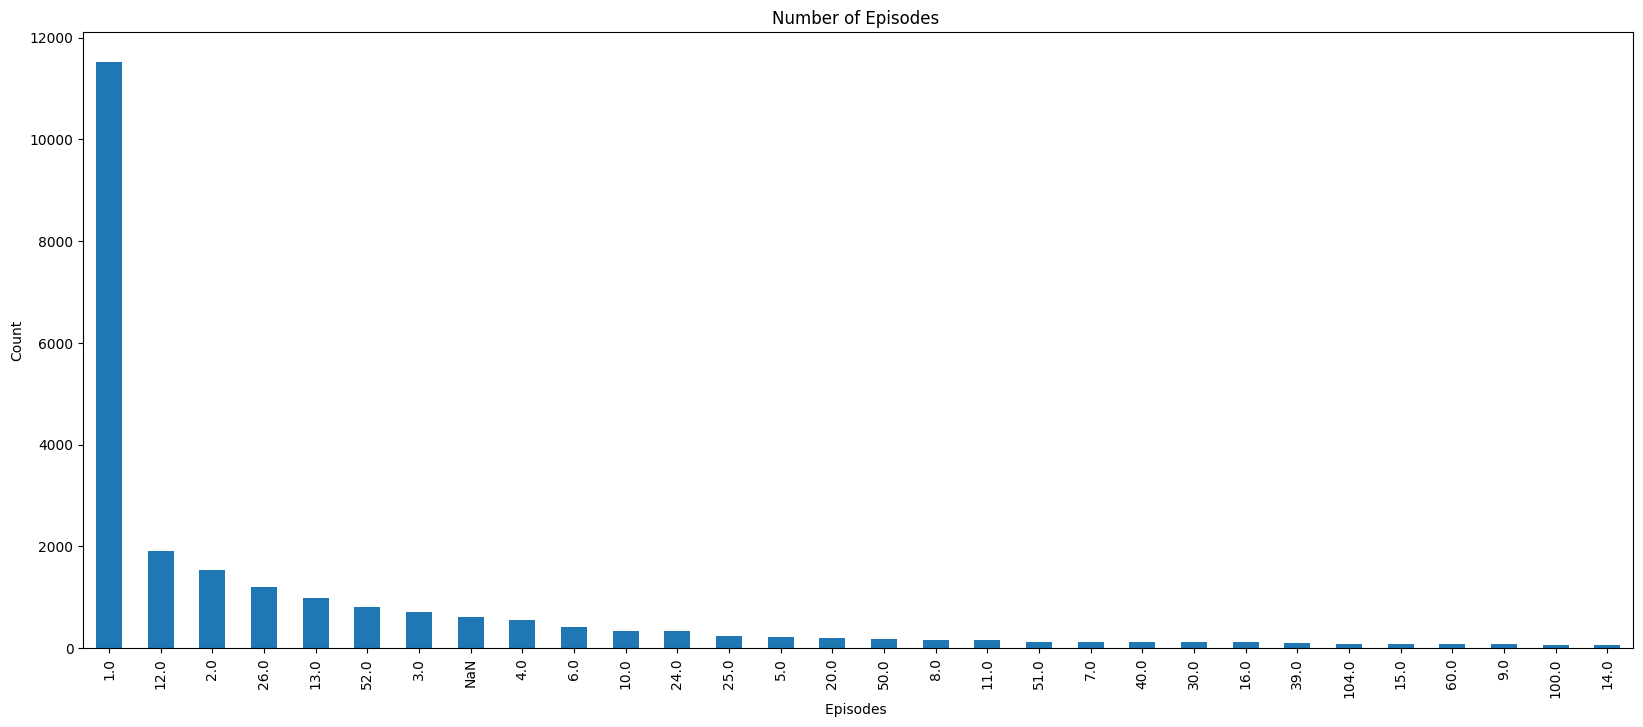

In [ ]:
episode_counts = parquet_df_anime['episodes'].value_counts().head(30)
# Plotting the bar graph
plt.figure(figsize=(20,8))
episode_counts.plot(kind='bar')
plt.title('Number of Episodes ')
plt.xlabel('Episodes ')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Count the number of anime titles by type
import plotly.express as px

# Count the number of anime titles by type
type_counts = parquet_df_anime_updated['type'].value_counts()
# Define custom colors for each type
custom_colors = ['blue', 'green', 'red', 'purple', 'orange', 'maroon', 'brown']

# Create a bar chart
fig = px.bar(type_counts, x=type_counts.index, y=type_counts.values, color_discrete_sequence=custom_colors, color=type_counts.index, labels={'x':'Anime Type', 'y':'Count'},
             title='Count of Anime Titles by Type')

fig.show()

In [ ]:
# Filter out anime titles with popularity value 0
df_valid_popularity = parquet_df_anime_updated[parquet_df_anime_updated['popularity'] > 0]

# Sort the dataframe by popularity and select the top 15
top_10_popular = df_valid_popularity.sort_values(by='popularity', ascending=True).head(20)

# Create a bar chart with different colors for each bar
fig = px.bar(top_10_popular, x='name', y='popularity',
             labels={'name': 'Anime Title', 'popularity': 'Popularity'},
             title='Top 20 Most Popular Animes',
             #color_discrete_sequence=custom_colors,
             color='name')
# Note:- Less the popularity no. is more popular is the anime.
fig.show()

In [ ]:
!pip install wordcloud


In [ ]:
from wordcloud import WordCloud
import plotly.graph_objects as go  # for 3D plot visualization

# Concatenate all genre values into a single string
genre_text = ' '.join(parquet_df_anime_updated[parquet_df_anime_updated['genres'] != "UNKNOWN"]['genres'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

# Convert the WordCloud object to an image
wordcloud_image = wordcloud.to_image()

# Create a Plotly figure to display the WordCloud image
fig = go.Figure(go.Image(z=wordcloud_image))
fig.update_layout(title='Genres in MyAnimeList App')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Split the genres and count their occurrences
genre_counts = parquet_df_anime_updated[parquet_df_anime_updated['genres'] != "UNKNOWN"]['genres'].apply(lambda x: x.split(', ')).explode().value_counts()

# Create a bar chart
fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
             labels={'x':'Genre', 'y':'Count'},
             title='Count of Anime Titles by Genre',
             color=genre_counts.index)

fig.show()

In [ ]:
# Select the top 20 genres
top_20_genres = genre_counts.head(10
                                  )

# Create a bar chart with custom style
fig = px.bar(top_20_genres, x=top_20_genres.index, y=top_20_genres.values,
             labels={'x':'Genre', 'y':'Count'},
             title='Top 20 Most Popular Genres In The Anime Industry')

# Customize the bar chart appearance
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.8)

fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickfont=dict(size=12)),
                  yaxis=dict(titlefont=dict(size=14)))

fig.show()

In [ ]:
# Create the plotly figure
fig = go.Figure(data=[go.Pie(labels=top_20_genres.index, values=top_20_genres.values,
                             hole=0.6, hoverinfo='label+percent', textinfo='value')])

fig.update_layout(title='Distribution of Anime Genres',
                  legend=dict(font=dict(size=12), title='Genre'),
                  annotations=[dict(text='Genre', x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [ ]:
# Split the genres and count their occurrences
genre_counts = df_anime[df_anime['Genres'] != "UNKNOWN"]['Genres'].apply(lambda x: x.split(', ')).explode().value_counts()

# Create a bar chart
fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
             labels={'x':'Genre', 'y':'Count'},
             title='Count of Anime Titles by Genre',
             color=genre_counts.index)

fig.show()

In [ ]:
# Select the top 20 genres
top_20_genres = genre_counts.head(10)

# Create a bar chart with custom style
fig = px.bar(top_20_genres, x=top_20_genres.index, y=top_20_genres.values,
             labels={'x':'Genre', 'y':'Count'},
             title='Top 10 Most Popular Genres In The Anime Industry')

# Customize the bar chart appearance
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.8)

fig.update_layout(xaxis_tickangle=-45, xaxis=dict(tickfont=dict(size=12)),
                  yaxis=dict(titlefont=dict(size=14)))

fig.show()

In [ ]:
# Create the plotly figure
fig = go.Figure(data=[go.Pie(labels=top_20_genres.index, values=top_20_genres.values,
                             hole=0.6, hoverinfo='label+percent', textinfo='value')])

fig.update_layout(title='Distribution of Anime Genres',
                  legend=dict(font=dict(size=12), title='GenreList in MyAnimeList'),
                  annotations=[dict(text='Genre', x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [ ]:
# Sort the DataFrame by the 'Favorites' column in descending order
sorted_df = parquet_df_anime_updated.sort_values('favorites', ascending=False)

# Select the top 10 most favorited anime
top_favorites = sorted_df.head(10)

# Create the horizontal bar chart
fig = go.Figure(data=go.Bar(
    x=top_favorites['favorites'],
    y=top_favorites['name'],
    orientation='h',  # Set the orientation to horizontal
    marker=dict(color='#1f77b4'),  # Set the color of the bars
    text=top_favorites['favorites'],  # Set the text to be displayed on hover
    hovertemplate='Anime: %{y}<br>Favorites: %{x}<extra></extra>',  # Customize the hover template
))

# Set the title and axis labels
fig.update_layout(
    title='Top 10 Most Favorited Anime',
    xaxis_title='Number of Favorites',
    yaxis_title='Anime',
    title_font=dict(size=20),
    font=dict(size=12, color='#555555')
)

fig.show()

In [ ]:
sorted_df_user_details = parquet_df_user_details.sort_values(by='Episodes Watched')
sorted_df_user_details.head(100)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
684151,1166995,jman7407,None,None,None,2012-02-25T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522242,713935,harrisonsanc24,None,None,None,2011-10-08T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268184,325142,Uzimy,None,None,None,2010-05-05T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522243,713937,reimpoas146,None,None,None,2011-10-08T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268182,325140,estherkirby,None,None,None,2010-05-05T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522190,713831,bryonolson614,None,None,None,2011-10-08T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522191,713833,miltoncxtrujil,None,None,None,2011-10-08T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268296,325267,happy_vik,None,None,None,2010-05-06T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268295,325266,mrricegarden,Female,1990-02-05T00:00:00+00:00,"norway, oslo",2010-05-06T00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


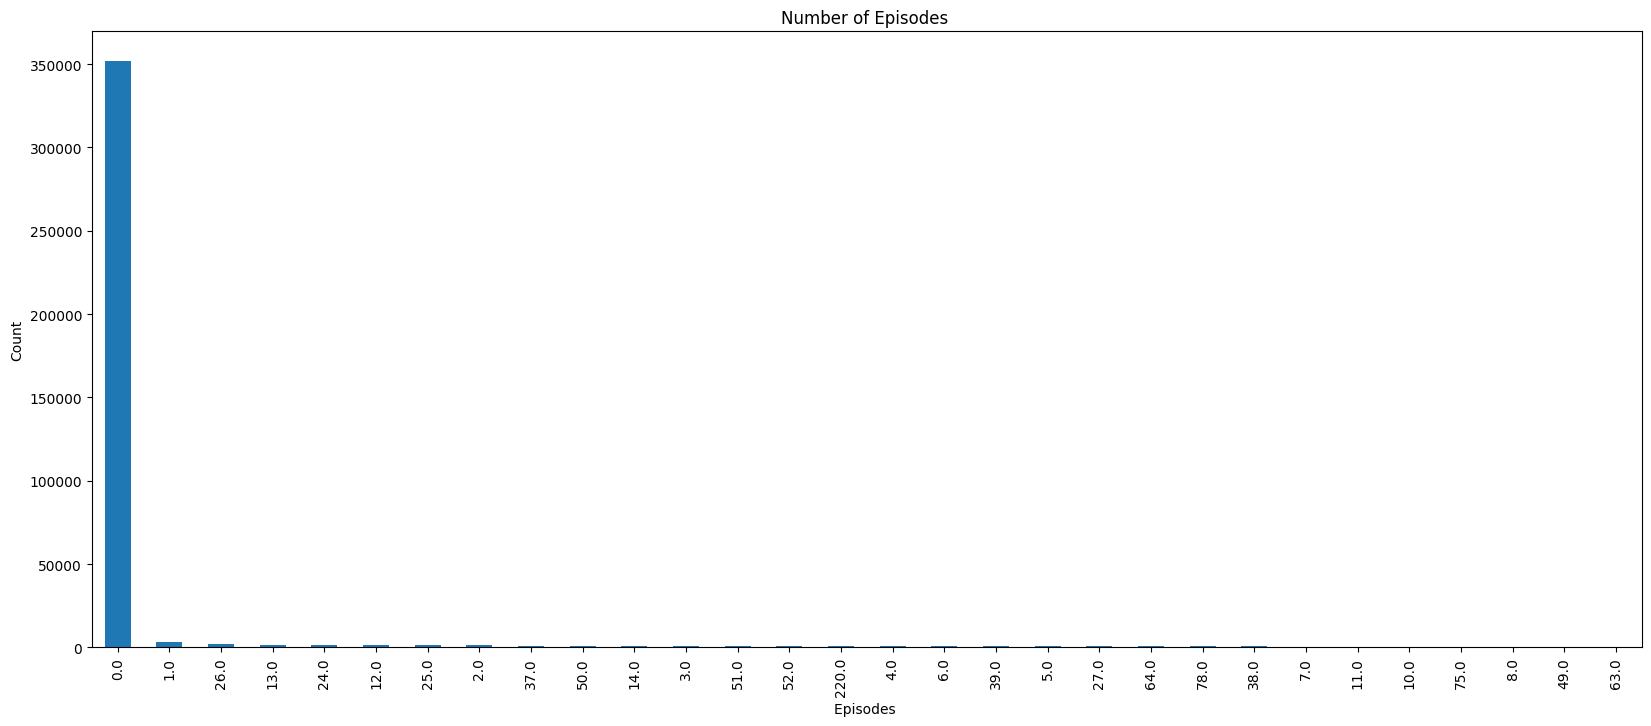

In [ ]:
episode_counts = sorted_df_user_details['Episodes Watched'].value_counts().head(30)
# Plotting the bar graph
plt.figure(figsize=(20,8))
episode_counts.plot(kind='bar')
plt.title('Number of Episodes ')
plt.xlabel('Episodes ')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# **Recommendation Sytem**

In [49]:
# Create a new column "User Type" based on the specified conditions
parquet_df_user_details['User Type'] = parquet_df_user_details['Watching'].apply(lambda x: 'New User' if 0.0 <= x <= 2.0 else 'Old User')

parquet_df_user_details.columns

Index(['Mal ID', 'Username', 'Gender', 'Birthday', 'Location', 'Joined',
       'Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
       'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched', 'User Type'],
      dtype='object')

In [67]:
parquet_df_user_details['Username']
sorted_usernames_by_watching = parquet_df_user_details.sort_values(by='Watching')['Username'].tolist()
sorted_usernames_by_watching[0:10]

['lannygolden229',
 'joemendoza37',
 'lyle134',
 'eddycotton998',
 'latortura93',
 'careysmall614',
 'SaKuRoChKa',
 'royboyle814',
 'willardbutle11',
 'pasqualelind717']

In [92]:
parquet_df_user_details['Username']

0              Xinil
1            Aokaado
2            Crystal
3             Arcane
4                Mad
             ...    
731285        Dolopa
731286    alenrobnik
731287     Oblongata
731288        Etnota
731289    JuunanaSai
Name: Username, Length: 731290, dtype: object

In [126]:
display(HTML("<b>Welcome to MyAnimeList</b>"))
# Create a text box for user input
user_input_widget = widgets.Text(description="Username:")

# Display the widget
display(user_input_widget)

# Function to be called when the button is clicked
def on_button_click(b):
    entered_username = user_input_widget.value
    entered_username_clean = entered_username.strip().lower()
# Convert DataFrame usernames to lowercase and strip whitespaces
    cleaned_usernames = parquet_df_user_details['Username'].str.strip().str.lower()

    if entered_username_clean in cleaned_usernames.values:
    # Retrieve the associated age
        associated_age = parquet_df_user_details.loc[cleaned_usernames == entered_username_clean, 'Mal ID'].values[0]
        print(f"Hi '{entered_username}', welcome back!! ")
        print(f"Username '{entered_username}' found in the DataFrame with ID: {associated_age}")
    else:
        print(f"Username '{entered_username}' not found in the DataFrame.")
# Attach the function to the button's click event
submit_button = widgets.Button(description="Submit", style={'button_color': 'lightblue', 'font_weight': 'bold', 'font_size': '14px'})
submit_button.on_click(on_button_click)
display(submit_button)

SyntaxError: ignored